In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-16까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [3]:
import pandas as pd

df = pd.read_csv('weather.csv')

print(df.head(3))
print(df.tail(3))

           일시  평균 기온  최대 풍속  평균 풍속
0  2010-08-01   28.7    8.3    3.4
1  2010-08-02   25.2    8.7    3.8
2  2010-08-03   22.1    6.3    2.9
              일시  평균 기온  최대 풍속  평균 풍속
3650  2020-07-29   21.6    3.2    1.0
3651  2020-07-30   22.9    9.7    2.4
3652  2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [15]:
import pandas as pd

df = pd.read_csv('weather.csv')

df['일시'] = pd.to_datetime(df['일시'])
date = df[df['일시'] == '2015-06-06']

print("2015년 6월 6일의 평균 기온:", date['평균 기온'].values[0])
print("2015년 6월 6일의 최대 풍속:", date['최대 풍속'].values[0])
print("2015년 6월 6일의 평균 풍속:", date['평균 풍속'].values[0])

2015년 6월 6일의 평균 기온: 16.6
2015년 6월 6일의 최대 풍속: 4.4
2015년 6월 6일의 평균 풍속: 1.9


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [20]:
import pandas as pd

df = pd.read_csv('weather.csv')

hot = df[df['평균 기온'] == df['평균 기온'].max()]
hot

,일시,평균 기온,최대 풍속,평균 풍속
1103,2013-08-08,31.3,7.8,4.6


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [27]:
import pandas as pd

df = pd.read_csv('weather.csv')

hotdays = df[df['평균 기온'] > 30]
hotdays

,일시,평균 기온,최대 풍속,평균 풍속
1103,2013-08-08,31.3,7.8,4.6
1104,2013-08-09,30.6,9.9,6.4
1105,2013-08-10,30.6,7.4,3.8
2913,2018-07-23,30.5,6.5,1.6
2925,2018-08-04,30.3,5.8,3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

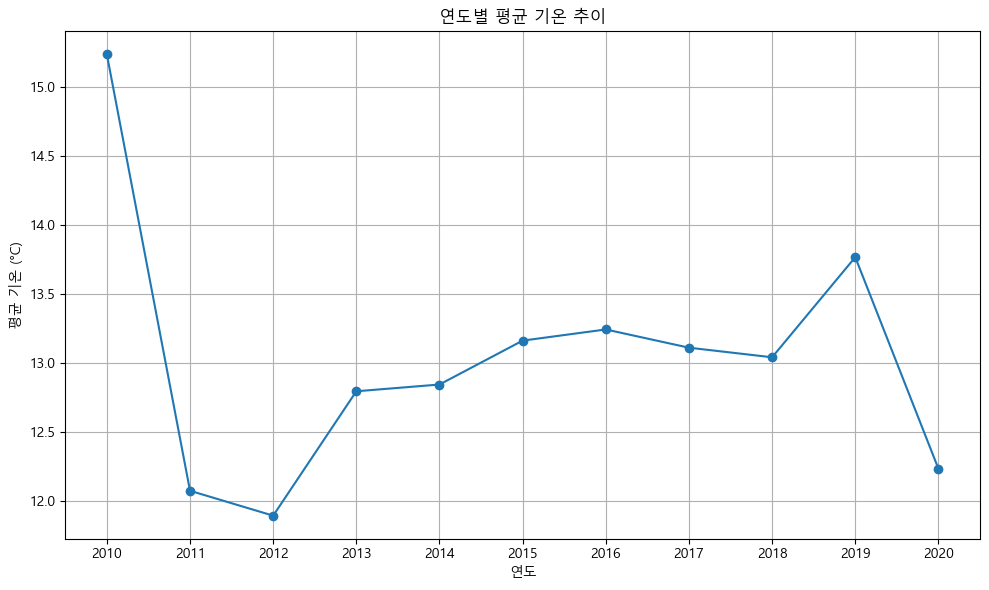

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'Malgun Gothic'

df = pd.read_csv('weather.csv')

df['year'] = pd.DatetimeIndex(df['일시']).year

yearly_mean_temp = df.groupby('year')['평균 기온'].mean()

plt.figure(figsize=(10, 6))
yearly_mean_temp.plot(marker='o')
plt.title('연도별 평균 기온 추이')
plt.xlabel('연도')
plt.ylabel('평균 기온 (°C)')
plt.grid(True)
plt.xticks(yearly_mean_temp.index)  
plt.tight_layout()
plt.show()


## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

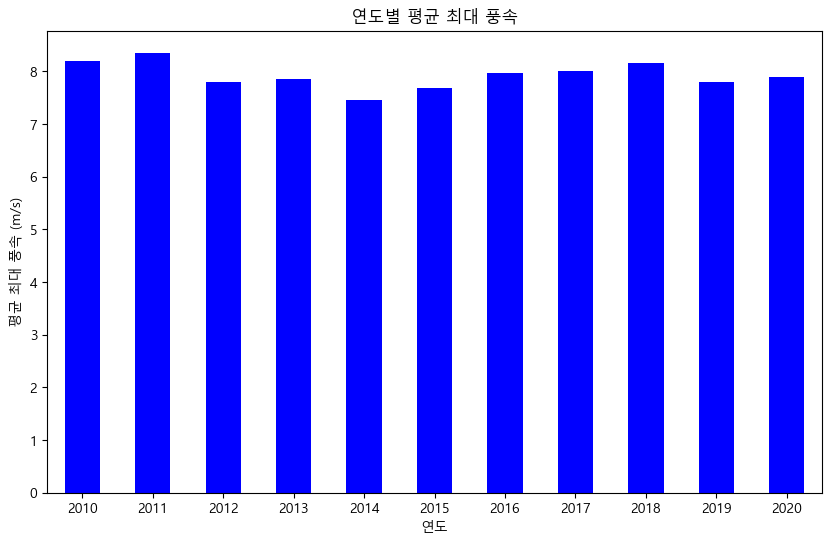

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('weather.csv')

df['연도'] = pd.DatetimeIndex(df['일시']).year

means = df.groupby('연도')['최대 풍속'].mean()

plt.figure(figsize=(10, 6))
means.plot(kind='bar', color='blue')
plt.title('연도별 평균 최대 풍속')
plt.xlabel('연도')
plt.ylabel('평균 최대 풍속 (m/s)')
plt.xticks(rotation=0)
plt.show()


## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


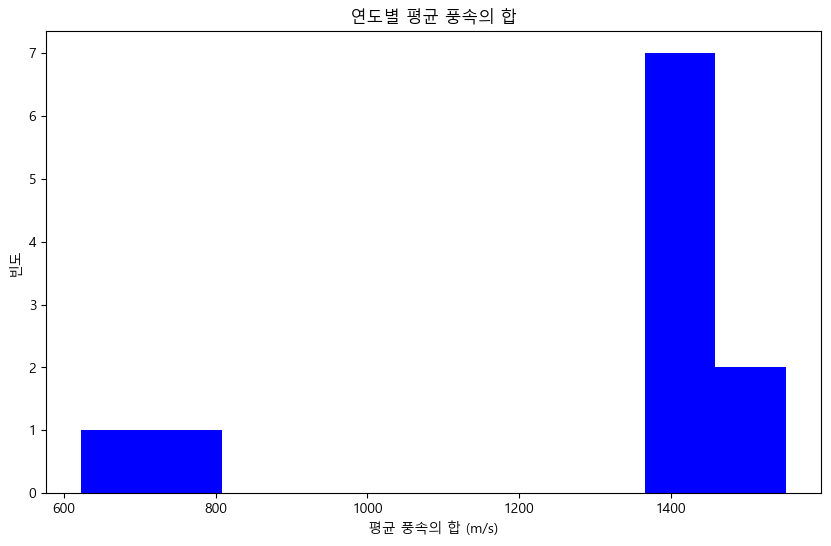

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('weather.csv')
df['연도'] = pd.DatetimeIndex(df['일시']).year

mean_sum = df.groupby('연도')['평균 풍속'].sum()

plt.figure(figsize=(10, 6))
plt.hist(mean_sum, bins=10, color='blue', )
plt.title('연도별 평균 풍속의 합')
plt.xlabel('평균 풍속의 합 (m/s)')
plt.ylabel('빈도')
plt.show()


## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [104]:
import pandas as pd

df = pd.read_csv('weather.csv')

df['연도'] = pd.DatetimeIndex(df['일시']).year

df_2015 = df[df['연도'] == 2015]
df_2016 = df[df['연도'] == 2016]

avg_2015 = df_2015['평균 기온'].mean()
avg_2016 = df_2016['평균 기온'].mean()

if avg_2015 > avg_2016:
    print("2015년이 더 더웠습니다.")
elif avg_2015 < avg_2016:
    print("2016년이 더 더웠습니다.")
else:
    print("2015년과 2016년의 평균 기온이 동일합니다.")


2016년이 더 더웠습니다.


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [101]:
import pandas as pd

df = pd.read_csv('weather.csv')

df['월'] = pd.DatetimeIndex(df['일시']).year

mean_sum = df.groupby('월')['평균 기온'].sum()

min_month = mean_sum.idxmin()
max_month = mean_sum.idxmax()

print("월별 '평균 기온'의 합이 가장 적은 달:", min_month, "월")
print("월별 '평균 기온'의 합이 가장 많은 달:", max_month, "월")


월별 '평균 기온'의 합이 가장 적은 달: 2010 월
월별 '평균 기온'의 합이 가장 많은 달: 2019 월


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [103]:
import pandas as pd

df = pd.read_csv('weather.csv')

df['연도'] = pd.DatetimeIndex(df['일시']).year

mean_max = df.groupby('연도')['최대 풍속'].mean()

max_mean_year = mean_max.idxmax()

print("연도별 '최대 풍속'의 평균이 가장 큰 연도:", max_mean_year)


연도별 '최대 풍속'의 평균이 가장 큰 연도: 2011
